In [ ]:


import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_image(title, img):
    plt.figure(figsize=(6,6))
    if len(img.shape) == 3:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
    else:
        plt.imshow(img, cmap='gray')
    
    plt.title(title)
    plt.axis('off')
    plt.show()

First, let's create a base image to work with:


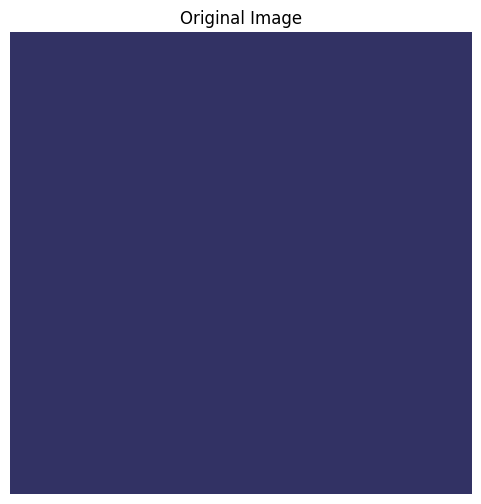

Image saved successfully as 'lab5_task_image.jpg'


In [ ]:
# 1. Reading & Creating Images

height = 300
width = 300
img = np.zeros((height, width, 3), dtype="uint8")

# Fill with base color (BGR)
img[:] = (100, 50, 50) 

show_image("Original Image", img)

cv2.imwrite("lab5_task_image.jpg", img)
print("Image saved successfully as 'lab5_task_image.jpg'")


--- Resizing & Cropping ---
Original shape: (300, 300, 3)
Resized shape: (600, 600, 3)
Cropped shape: (200, 200, 3)


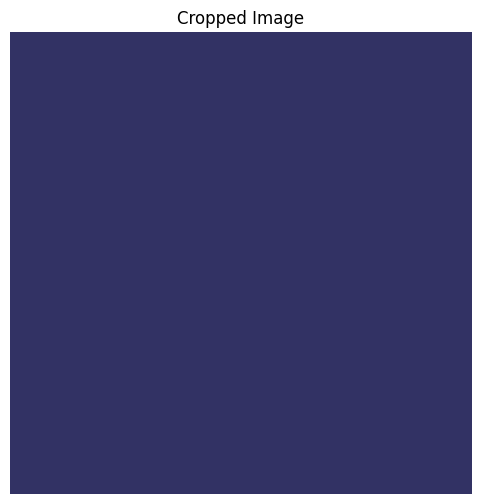

In [ ]:
# 2. Resizing & Cropping
print("\n--- Resizing & Cropping ---")

resized_img = cv2.resize(img, (600, 600))
print(f"Original shape: {img.shape}")
print(f"Resized shape: {resized_img.shape}")

# Cropping using array slicing [y1:y2, x1:x2]
cropped_img = resized_img[200:400, 200:400]
print(f"Cropped shape: {cropped_img.shape}")

show_image("Cropped Image", cropped_img)

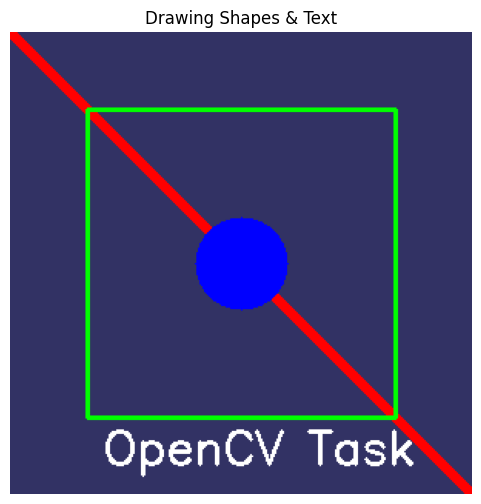

In [ ]:
# 3. Drawing Shapes & Text
draw_image = img.copy()

# Draw Shapes: Line, Rectangle, Circle
cv2.line(draw_image, (0, 0), (300, 300), (0, 0, 255), 5)
cv2.rectangle(draw_image, (50, 50), (250, 250), (0, 255, 0), 2)
cv2.circle(draw_image, (150, 150), 30, (255, 0, 0), -1)

# Add Text
cv2.putText(draw_image, "OpenCV Task", (60, 280), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

show_image("Drawing Shapes & Text", draw_image)

Converted to Grayscale:


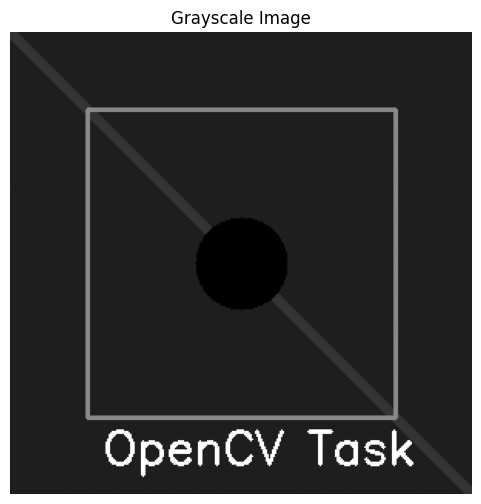

In [ ]:
# 4. Color Spaces (BGR to Gray)
gray_img = cv2.cvtColor(draw_image, cv2.COLOR_BGR2GRAY)
show_image("Grayscale Image", gray_img)

Applied Binary Thresholding:


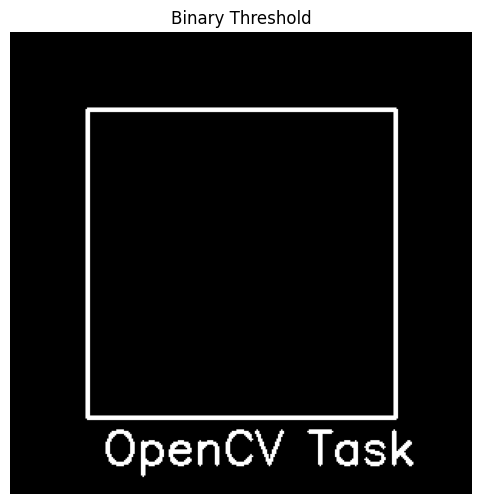

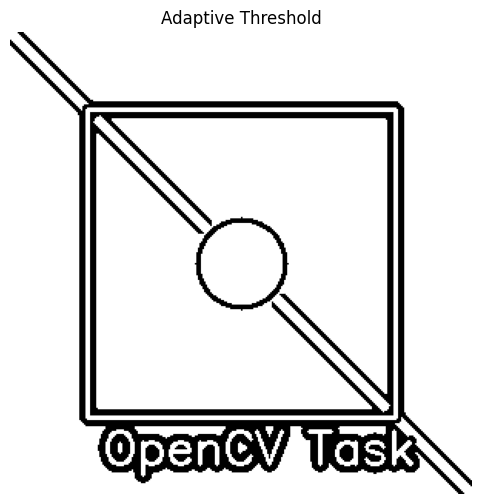

In [ ]:
# 5. Image Thresholding

# Simple Binary
ret, thresh_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
show_image("Binary Threshold", thresh_img)

# Adaptive Threshold
adaptive_thresh = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 11, 2)
show_image("Adaptive Threshold", adaptive_thresh)

Detected Edges (Canny):


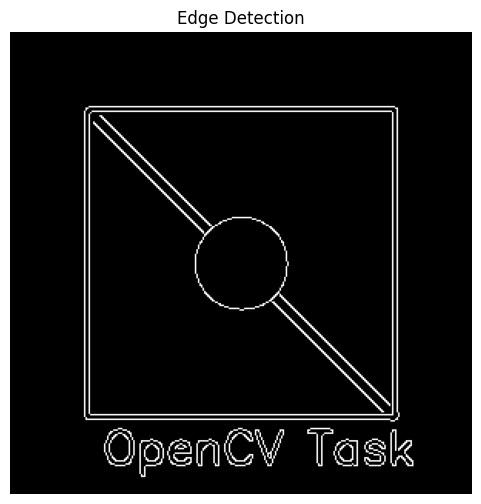

In [ ]:
# 6. Edge Detection
edges = cv2.Canny(gray_img, 100, 200)
show_image("Edge Detection", edges)

Number of contours found: 16


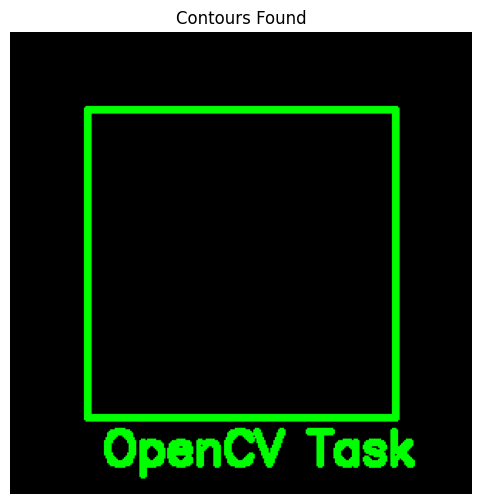

In [ ]:
# 7. Contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(f"Number of contours found: {len(contours)}")

# Draw Contours
contour_img = np.zeros_like(img)
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

show_image("Contours Found", contour_img)